In [1]:
import os
from PIL import Image
import numpy as np
import math
import glob

In [2]:
####Uploaded the given file 3images.zip
import zipfile
zip_ref = zipfile.ZipFile("3images.zip", "r")
zip_ref.extractall("./data")
zip_ref.close()

In [3]:
def DOG(s1,s2):
  x1 = np.outer([np.exp(-x**2/(2*s1**2))/np.sqrt(2*np.pi*s1**2) for x in range(-6*s2,6*s2+1)],[np.exp(-x**2/(2*s1**2))/np.sqrt(2*np.pi*s1**2) for x in range(-6*s2,6*s2+1)])
  x2 = np.outer([np.exp(-x**2/(2*s2**2))/np.sqrt(2*np.pi*s2**2) for x in range(-6*s2,6*s2+1)],[np.exp(-x**2/(2*s2**2))/np.sqrt(2*np.pi*s2**2) for x in range(-6*s2,6*s2+1)])
  return x1-x2  

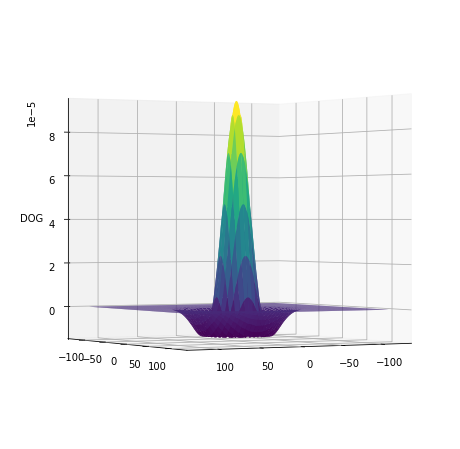

In [19]:
#DOG Visualisation
import matplotlib.pyplot as plt
sigma1 = 18
sigma2 = 20
x = np.arange(-6*sigma2,6*sigma2+1,1)
X,Y = np.meshgrid(x,x)
Z = DOG(sigma1,sigma2)
fig = plt.figure(figsize =(8,8))
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z,cmap="viridis")

ax.set_zlabel('DOG')
ax.view_init(0, 60)
plt.show()

In [6]:
##import image
images = []
pattern = os.path.join('./data/*.tif')
img_list = glob.glob(pattern)
img_list.sort()
for filename in img_list:
  # print(filename)
  im = Image.open(filename)
  images.append(np.array(im))

In [7]:
import cv2

In [8]:
def conv_mean(img,kernel):
  outp = cv2.filter2D(img,-1,kernel).mean(axis=-1)
  return outp/np.max(outp)

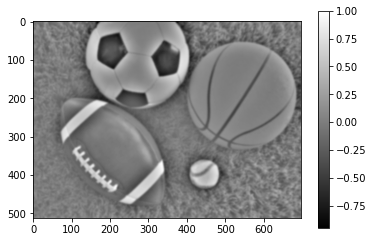

In [9]:
#Case 1 : sigma1 <<< sigma2
out = conv_mean(images[0]/255.0,DOG(2,20))
plt.imshow(out,cmap='gray')
plt.colorbar()
plt.show()

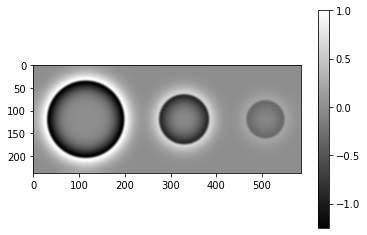

In [10]:
out = conv_mean(images[1]/255.0,DOG(2,20))
plt.imshow(out,cmap='gray')
plt.colorbar()
plt.show()

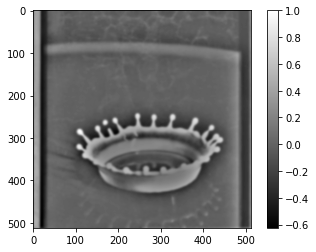

In [11]:
out = conv_mean(images[2]/255.0,DOG(2,20))
plt.imshow(out,cmap='gray')
plt.colorbar()
plt.show()

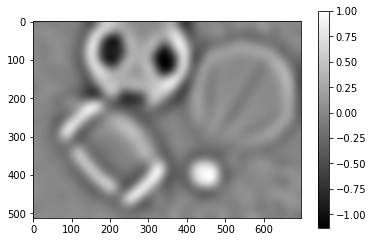

In [12]:
#Case 2 : sigma2 ≈ sigma1, sigma1 is large
out = conv_mean(images[0]/255.0,DOG(18,20))
plt.imshow(out,cmap='gray')
plt.colorbar()
plt.show()

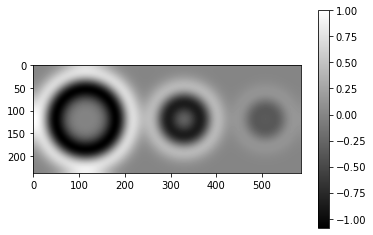

In [13]:
out = conv_mean(images[1]/255.0,DOG(18,20))
plt.imshow(out,cmap='gray')
plt.colorbar()
plt.show()

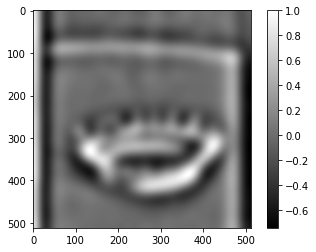

In [14]:
out = conv_mean(images[2]/255.0,DOG(18,20))
plt.imshow(out,cmap='gray')
plt.colorbar()
plt.show()

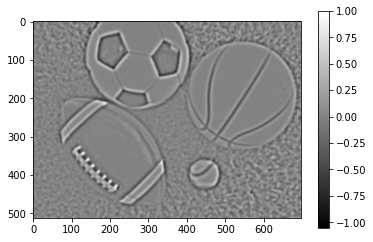

In [15]:
#Case 3 : sigma2 ≈ sigma1, sigma1 is small
out = conv_mean(images[0]/255.0,DOG(3,4))
plt.imshow(out,cmap='gray')
plt.colorbar()
plt.show()

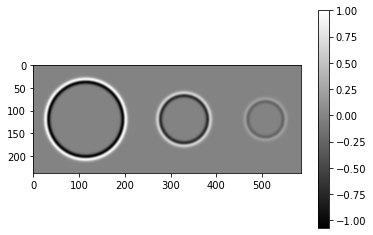

In [16]:
out = conv_mean(images[1]/255.0,DOG(3,4))
plt.imshow(out,cmap='gray')
plt.colorbar()
plt.show()

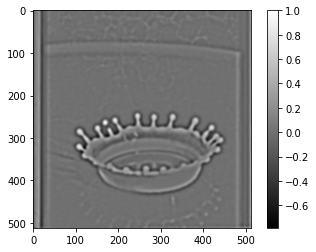

In [17]:
out = conv_mean(images[2]/255.0,DOG(3,4))
plt.imshow(out,cmap='gray')
plt.colorbar()
plt.show()